In [25]:
import pandas as pd

url = 'https://raw.githubusercontent.com/emadrigals104/PLFPython/main/Datasets/housing.csv'
df = pd.read_csv(url)

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [27]:
from sklearn.impute import SimpleImputer
import numpy as np

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# We need to reshape the data for the imputer
total_bedrooms = df['total_bedrooms'].values.reshape(-1, 1)

# Fit and transform the data
df['total_bedrooms'] = imputer.fit_transform(total_bedrooms)

# Verify that there are no more missing values
print(df.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [28]:
# Convert categorical variable into dummy/indicator variables
df = pd.get_dummies(df, columns=['ocean_proximity'])

# Display the first 5 rows of the encoded dataframe
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                      False                   False                   False   
1   

In [29]:
# Separate the target variable (y) from the features (X)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Print the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Display the first 5 rows of X
print('Features(X):')
print(X.head())

# Display the first 5 rows of y
print('Target (Y):')
print(y.head())

Shape of X: (20640, 13)
Shape of y: (20640,)
Features(X):
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity_<1H OCEAN  \
0       322.0       126.0         8.3252                      False   
1      2401.0      1138.0         8.3014                      False   
2       496.0       177.0         7.2574                      False   
3       558.0       219.0         5.6431                      False   
4       565.0       259.0         3.8462                      False   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximi

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16512, 13)
Shape of X_test: (4128, 13)
Shape of y_train: (16512,)
Shape of y_test: (4128,)


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# You might also need these for regression:
from sklearn.metrics import mean_squared_error, r2_score
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
# %% Create a dictionary of models

models = {
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [33]:
# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the training data
    y_pred_train = model.predict(X_train_scaled)
    
    # Calculate the root mean squared error (RMSE)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    
    print(f"Model: {name}")
    print(f"Training RMSE: {rmse_train:.2f}")
    print("-" * 30)

Model: Gradient Boosting
Training RMSE: 52901.31
------------------------------
Model: Linear Regression
Training RMSE: 68433.94
------------------------------
Model: Decision Tree
Training RMSE: 0.00
------------------------------
Model: Random Forest
Training RMSE: 18073.21
------------------------------


Model: Gradient Boosting
Test RMSE: 55881.78


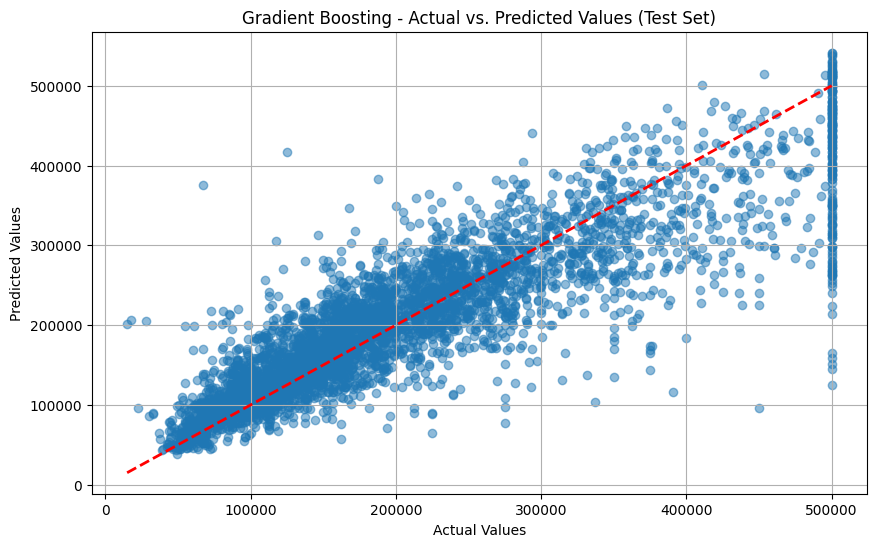

------------------------------
Model: Linear Regression
Test RMSE: 70060.62


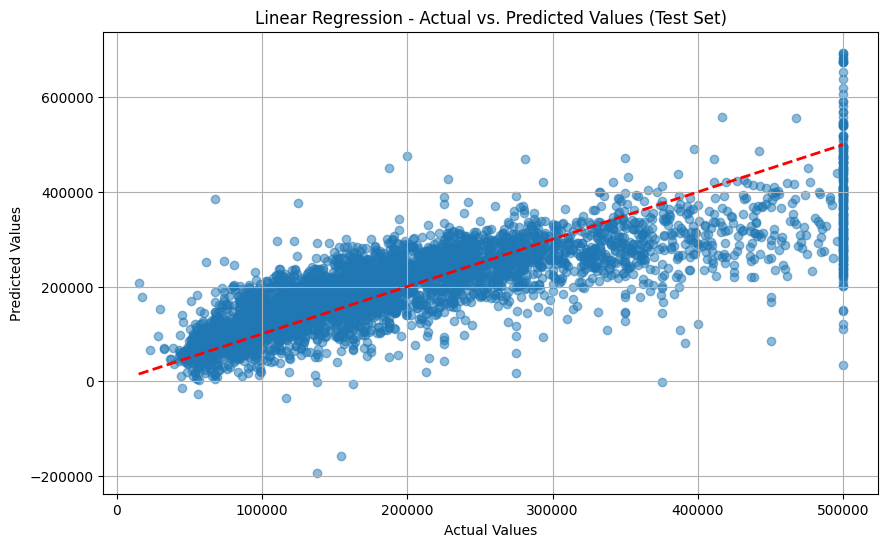

------------------------------
Model: Decision Tree
Test RMSE: 69078.77


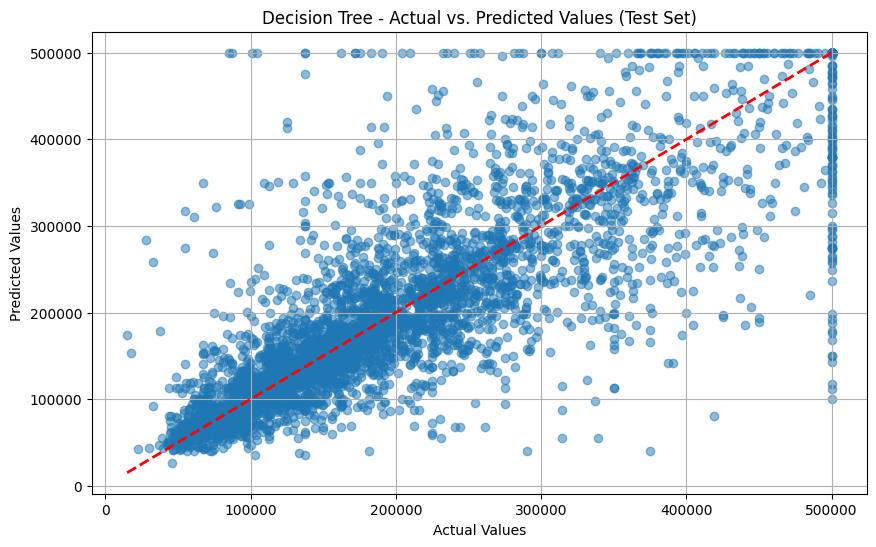

------------------------------
Model: Random Forest
Test RMSE: 48941.95


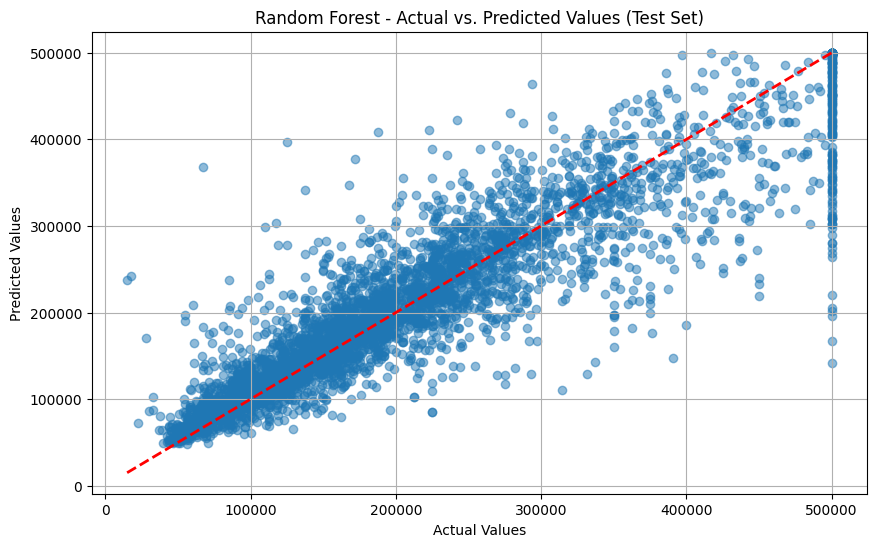

------------------------------


In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluate models on the test set and visualize the results
for name, model in models.items():
    # Make predictions on the test data
    y_pred_test = model.predict(X_test_scaled)
    
    # Calculate the root mean squared error (RMSE) on the test data
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Print the test RMSE
    print(f"Model: {name}")
    print(f"Test RMSE: {rmse_test:.2f}")
    
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{name} - Actual vs. Predicted Values (Test Set)")
    plt.grid(True)
    plt.show()
    
    print("-" * 30)